# k-Nearest Neighbours (kNN)

### Classification

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print some predictions and the accuracy
print('Predictions for the first 5 test samples:', y_pred[:5])

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the model:', accuracy)

Predictions for the first 5 test samples: [0 0 1 2 1]
Accuracy of the model: 0.9333333333333333


### Regression

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing_data = fetch_california_housing()
X, y = housing_data.data, housing_data.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize KNN regressor with n_neighbors=3
knn_reg = KNeighborsRegressor(n_neighbors=4)

# Fit the regressor to the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_reg.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Predictions for the first 5 test samples:", y_pred[:5])

Mean Squared Error: 1.1793945620044588
Predictions for the first 5 test samples: [1.22325 2.559   1.522   1.627   1.5395 ]


### Regression for different n_neighbors

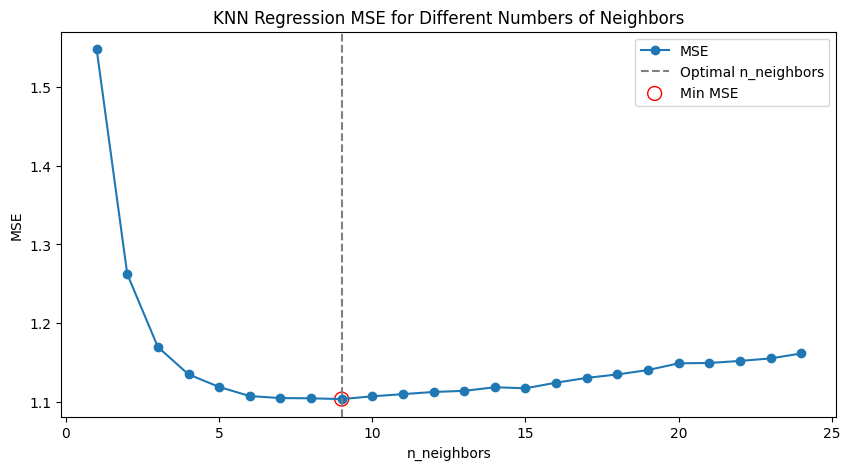

(9, 1.103251681789815)

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing_data = fetch_california_housing()
X, y = housing_data.data, housing_data.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of n_neighbors to test
neighbors_settings = range(1, 25)

# List to store the mean squared errors for different n_neighbors
mse_values = []

# Loop over different values of k
for n_neighbors in neighbors_settings:
    # Build the KNN model
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


# Find the minimum MSE and the corresponding best number of neighbors
min_mse = min(mse_values)
best_n_neighbors = neighbors_settings[mse_values.index(min_mse)]

# Plotting the MSE values for different n_neighbors
plt.figure(figsize=(10, 5))
plt.plot(neighbors_settings, mse_values, marker='o', label='MSE')
plt.axvline(x=best_n_neighbors, color='gray', linestyle='--', label='Optimal n_neighbors')
plt.scatter(best_n_neighbors, min_mse, color='red', facecolors='none', s=100, label='Min MSE')

plt.title('KNN Regression MSE for Different Numbers of Neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Output the optimal number of neighbors and the corresponding MSE
best_n_neighbors, min_mse